<a href="https://colab.research.google.com/github/NguyenGiaKhanh141/Predicting-the-likelihood-of-diabetes-in-Arizona/blob/main/Predicting_the_likelihood_of_diabetes_in_Arizona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import sqlite3 as sql
%matplotlib inline
%matplotlib inline

# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [ ]:
import pymysql

conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='',db='pima-indians-diabetes')

df=pd.read_sql_query("SELECT * FROM pima_indians_diabetes ",conn)
df

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,COL 1,COL 2,COL 3,COL 4,COL 5,COL 6,COL 7,COL 8,COL 9
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#TO DO:
df.columns =["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

In [ ]:
print(df.dtypes)

NumTimesPrg       int64
PlGlcConc         int64
BloodP            int64
SkinThick         int64
TwoHourSerIns     int64
BMI              object
DiPedFunc        object
Age               int64
HasDiabetes       int64
dtype: object


In [ ]:
df['BMI'] = df['BMI'].astype('float')
df['DiPedFunc'] = df['DiPedFunc'].astype('float')

## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [ ]:
#TO DO:
# Number of times pregnant
# Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# Diastolic blood pressure (mm Hg)
# Triceps skinfold thickness (mm)
# 2-Hour serum insulin (mu U/ml)
# Body mass index (weight in kg/(height in m)^2)
# Diabetes pedigree function
# Age (years)
df.shape


(768, 9)

In [ ]:
df.head(1)

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1


# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [ ]:
#TO DO:
df.corr()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4. Render the corr matrix using the heatmap in seaborn.

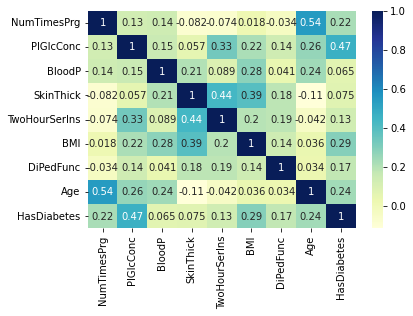

In [ ]:
#TO DO:
%matplotlib inline
import matplotlib.pyplot as mp
import seaborn as sb
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [ ]:
print(df['HasDiabetes'].corr(df['PlGlcConc']))


0.4665813983068738


In [ ]:
print(df['PlGlcConc'])

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: PlGlcConc, Length: 768, dtype: int64


## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

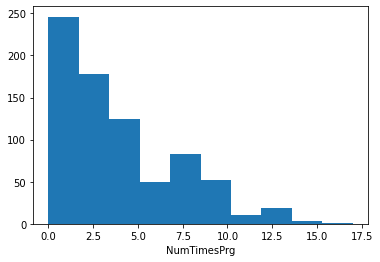

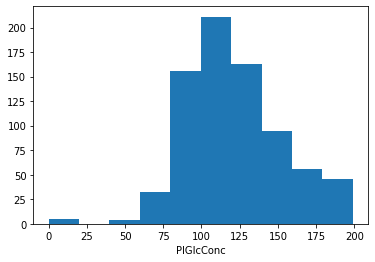

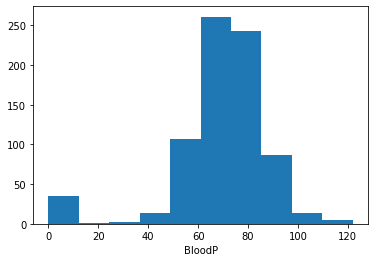

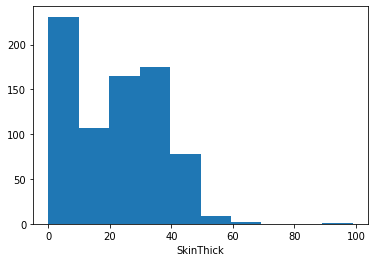

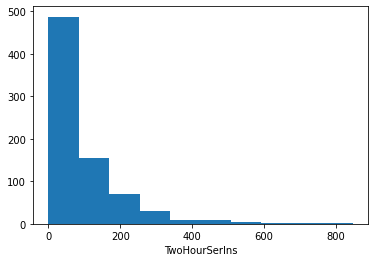

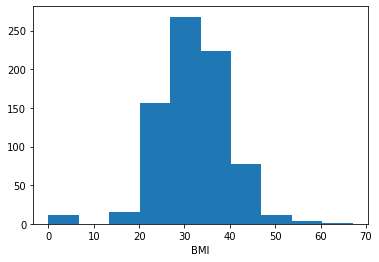

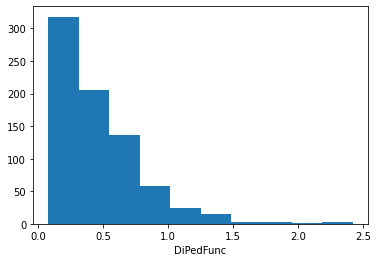

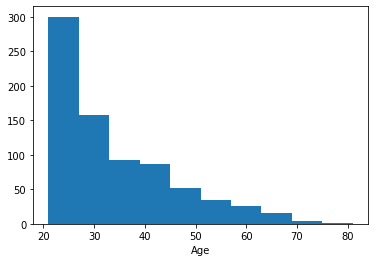

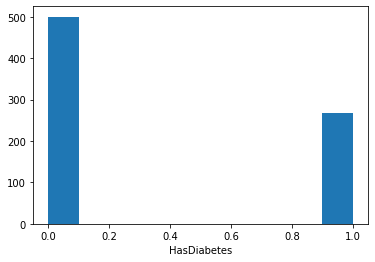

In [ ]:
#TO DO:
for col in df.columns:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

In [ ]:
df['BMI'] = df['BMI'].replace(0,np.NaN)
df['BloodP'] = df['BloodP'].replace(0,np.NaN)
df['PlGlcConc'] = df['PlGlcConc'].replace(0,np.NaN)
df['SkinThick'] = df['SkinThick'].replace(0,np.NaN)
df['TwoHourSerIns'] = df['TwoHourSerIns'].replace(0,np.NaN)

In [ ]:
df

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
#TO DO:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['BloodP'] = df['BloodP'].fillna(df['BloodP'].mean())
df['PlGlcConc'] = df['PlGlcConc'].fillna(df['PlGlcConc'].mean())
df['SkinThick'] = df['SkinThick'].fillna(df['SkinThick'].mean())
df['TwoHourSerIns'] = df['TwoHourSerIns'].fillna(df['TwoHourSerIns'].mean())

In [ ]:
df

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [ ]:
#TO DO:
feature_df = df[["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age"]]
X = np.asarray(feature_df)
y= np.asarray(df['HasDiabetes'])


In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 6.39947260e-01,  8.65108070e-01, -3.35182392e-02,
         6.65502121e-01, -3.34507888e-16,  1.66291742e-01,
         4.68491977e-01,  1.42599540e+00],
       [-8.44885053e-01, -1.20616153e+00, -5.29859033e-01,
        -1.74633816e-02, -3.34507888e-16, -8.52531177e-01,
        -3.65060778e-01, -1.90671905e-01],
       [ 1.23388019e+00,  2.01581340e+00, -6.95305964e-01,
         8.08793628e-16, -3.34507888e-16, -1.33283341e+00,
         6.04397318e-01, -1.05584152e-01],
       [-8.44885053e-01, -1.07465235e+00, -5.29859033e-01,
        -7.00428884e-01, -7.24388738e-01, -6.34211980e-01,
        -9.20762614e-01, -1.04154944e+00],
       [-1.14185152e+00,  5.03457822e-01, -2.68066914e+00,
         6.65502121e-01,  1.46550563e-01,  1.54897999e+00,
         5.48490910e+00, -2.04963989e-02]])

# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [ ]:
#TO DO:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

Data normalization is structuring our database to follow a series of standards. This improves the accuracy and integrity of your data, while making your database easier to navigate.
Put simply, data normalization ensures uniformity in how our data looks, reads, and can be utilized—across all of the records in our database.

### TO DO:


### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [ ]:
print('proportion of positive/total women who have diabetes on the full dataset',np.sum(y)/len(y))
print('proportion of positive/total women who have diabetes on the train dataset',np.sum(y_train)/len(y_train))
print('proportion of positive/total women who have diabetes on the test dataset',np.sum(y_test)/len(y_test))

proportion of positive/total women who have diabetes on the full dataset 0.3489583333333333
proportion of positive/total women who have diabetes on the train dataset 0.34364820846905536
proportion of positive/total women who have diabetes on the test dataset 0.37012987012987014


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [ ]:
from sklearn.metrics import jaccard_score

In [ ]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
j=[]

o = 100
for i in range(o, 0, -1):
    j.append(i)
    

In [ ]:
#First, we will select our algorithm
algorithm = KNeighborsClassifier()
#We will adopt the approach we saw in the last chapter of using k-fold cross-validation. 
#In this example, I use 10 olds (typically you may use 5 to 10):
seed = 20
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#Now we can create a set of candidate hyperparameters that we want to examine:
hp_candidates = [{'n_neighbors': j, 'weights': ['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}]
#And we can pass this algorithm and set of hyperparameters to the GridSearchCV() function
#asking it to use R-squared to evaluate the models it creates. We fit each model it creates using the training data:
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='accuracy',refit=True)
grid.fit(X_train, y_train)
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7624537281861448
KNeighborsClassifier(n_neighbors=19)
{'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'uniform'}


In [ ]:
grid.cv_results_

{'mean_fit_time': array([1.99553967e-03, 9.97257233e-04, 7.97891617e-04, 9.97471809e-04,
        4.98604774e-04, 4.98032570e-04, 6.98399544e-04, 7.90572166e-04,
        9.98783112e-04, 8.98480415e-04, 8.96191597e-04, 8.98599625e-04,
        5.01775742e-04, 5.98955154e-04, 6.97708130e-04, 8.01682472e-04,
        6.95824623e-04, 7.98797607e-04, 7.97605515e-04, 6.90293312e-04,
        5.00440598e-04, 5.98621368e-04, 8.93998146e-04, 6.97374344e-04,
        6.00457191e-04, 6.97708130e-04, 6.95657730e-04, 9.94729996e-04,
        7.05218315e-04, 7.96580315e-04, 6.97016716e-04, 7.95173645e-04,
        7.97772408e-04, 7.02810287e-04, 5.98478317e-04, 6.98375702e-04,
        8.92353058e-04, 6.01792336e-04, 9.99546051e-04, 7.01642036e-04,
        5.95903397e-04, 7.99489021e-04, 8.01038742e-04, 6.94847107e-04,
        8.98408890e-04, 9.88006592e-04, 6.98256493e-04, 7.11655617e-04,
        7.98153877e-04, 7.98368454e-04, 9.97638702e-04, 6.98423386e-04,
        8.97550583e-04, 7.99727440e-04, 8.96930

In [ ]:
#TO DO:

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.


- n_neighborsint, default=5
+Number of neighbors to use by default for kneighbors queries.

- weights{‘uniform’, ‘distance’} or callable, default=’uniform’
Weight function used in prediction. Possible values:

    +‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

    +‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

- algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

    +‘ball_tree’ will use BallTree

    +‘kd_tree’ will use KDTree

    +‘brute’ will use a brute-force search.
    
    +‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

### TO DO:


### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
#TO DO:

In [ ]:
neigh = KNeighborsClassifier(algorithm ='auto',leaf_size =50, n_neighbors= 19,p=2, weights ='distance') #n_neighbors là hàm số K mình chọn
neighfit=neigh.fit(X_train,y_train)


In [ ]:
yhat = neighfit.predict(X_test)
yhat[0:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [ ]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
jaccard_scores1 =jaccard_score(y_test, yhat,pos_label=0)
f1_scores1  = metrics.accuracy_score(y_test, yhat)
print('Test set Jaccard score:',jaccard_scores1)
print("Test set Accuracy: ", f1_scores1) 

Test set Jaccard score: 0.7372881355932204
Test set Accuracy:  0.7987012987012987


In [ ]:
yhat_train = neighfit.predict(X_train)
jaccard_scores1_train =jaccard_score(y_train, yhat_train,pos_label=0)
f1_scores1_train  = metrics.accuracy_score(y_train, yhat_train)
print('Train set Jaccard score:',jaccard_scores1_train)
print("Train set Accuracy: ", f1_scores1_train) 

Train set Jaccard score: 1.0
Train set Accuracy:  1.0


# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#TO DO:

In [ ]:
#First, we will select our algorithm
algorithm = DecisionTreeClassifier()
#We will adopt the approach we saw in the last chapter of using k-fold cross-validation. 
#In this example, I use 10 olds (typically you may use 5 to 10):
seed = 30
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#Now we can create a set of candidate hyperparameters that we want to examine:
hp_candidates = [{ 'criterion': ['gini','entropy','log_loss'], 'splitter':['best','random'],'max_depth': [1,2,3,4,5,6,7,8,9,10]}]
#And we can pass this algorithm and set of hyperparameters to the GridSearchCV() function
#asking it to use R-squared to evaluate the models it creates. We fit each model it creates using the training data:
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, scoring='accuracy',return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.7475143276022924
DecisionTreeClassifier(criterion='log_loss', max_depth=5)
{'criterion': 'log_loss', 'max_depth': 5, 'splitter': 'best'}


In [ ]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')
drugTreefit=drugTree.fit(X_train,y_train)
predTree = drugTreefit.predict(X_test)
print (predTree [0:5])

print (y_test [0:5])

[0 1 1 0 1]
[0 1 1 0 1]


In [ ]:
jaccard_scores2 =jaccard_score(y_test, predTree,pos_label=0)
f1_scores2  = metrics.accuracy_score(y_test, predTree)
print('Test set Jaccard score:',jaccard_scores2)
print("Test set Accuracy: ", f1_scores2) 

Test set Jaccard score: 0.75
Test set Accuracy:  0.8181818181818182


In [ ]:
predTree_train = drugTreefit.predict(X_train)
jaccard_scores2_train =jaccard_score(y_train, predTree_train,pos_label=0)
f1_scores2_train  = metrics.accuracy_score(y_train, predTree_train)
print('Train set Jaccard score:',jaccard_scores2_train)
print("Train set Accuracy: ", f1_scores2_train) 

Train set Jaccard score: 0.6924643584521385
Train set Accuracy:  0.754071661237785


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

### TO DO:


In [ ]:
#TO DO:


- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

- splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
from sklearn import svm

In [ ]:
#TO DO:1, 10,30,40,50,60,70,80,90,100,110,120,125,130,140,1000

In [ ]:
#First, we will select our algorithm
algorithm = svm.SVC()
#We will adopt the approach we saw in the last chapter of using k-fold cross-validation. 
#In this example, I use 10 olds (typically you may use 5 to 10):
seed = 20
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#Now we can create a set of candidate hyperparameters that we want to examine:
hp_candidates=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.01,0.001, 0.0001], 'kernel': ['rbf']},
               {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly']}]
#And we can pass this algorithm and set of hyperparameters to the GridSearchCV() function
#asking it to use R-squared to evaluate the models it creates. We fit each model it creates using the training data:
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, verbose = 3,refit=True)
grid.fit(X_train, y_train)

# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END ...............C=1, kernel=linear;, score=0.806 total time=   0.0s
[CV 2/10] END ...............C=1, kernel=linear;, score=0.726 total time=   0.0s
[CV 3/10] END ...............C=1, kernel=linear;, score=0.758 total time=   0.0s
[CV 4/10] END ...............C=1, kernel=linear;, score=0.661 total time=   0.0s
[CV 5/10] END ...............C=1, kernel=linear;, score=0.803 total time=   0.0s
[CV 6/10] END ...............C=1, kernel=linear;, score=0.770 total time=   0.0s
[CV 7/10] END ...............C=1, kernel=linear;, score=0.836 total time=   0.0s
[CV 8/10] END ...............C=1, kernel=linear;, score=0.770 total time=   0.0s
[CV 9/10] END ...............C=1, kernel=linear;, score=0.689 total time=   0.0s
[CV 10/10] END ..............C=1, kernel=linear;, score=0.820 total time=   0.0s
[CV 1/10] END ..............C=10, kernel=linear;, score=0.806 total time=   0.0s
[CV 2/10] END ..............C=10, kernel=linea

In [ ]:
clf = svm.SVC(kernel='rbf',C=1, gamma='auto',probability = True) # phải có probability = True thì mới dùng đc ensemble sau này
clffit=clf.fit(X_train, y_train) 

In [ ]:
yhat2 = clffit.predict(X_test)
yhat2 [0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [ ]:
jaccard_scores3 =jaccard_score(y_test, yhat2,pos_label=0)
f1_scores3  = metrics.accuracy_score(y_test, yhat2)
print('Test set Jaccard score:',jaccard_scores3)
print("Test set Accuracy: ", f1_scores3) 

Test set Jaccard score: 0.7606837606837606
Test set Accuracy:  0.8181818181818182


In [ ]:
yhat2_train = clffit.predict(X_train)
jaccard_scores3_train =jaccard_score(y_train, yhat2_train,pos_label=0)
f1_scores3_train  = metrics.accuracy_score(y_train, yhat2_train)
print('Train set Jaccard score:',jaccard_scores3_train)
print("Train set Accuracy: ", f1_scores3_train) 

Train set Jaccard score: 0.7674897119341564
Train set Accuracy:  0.8159609120521173


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:



- Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

- kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

- degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#First, we will select our algorithm
algorithm = LogisticRegression()
#We will adopt the approach we saw in the last chapter of using k-fold cross-validation. 
#In this example, I use 10 olds (typically you may use 5 to 10):
seed = 20
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#Now we can create a set of candidate hyperparameters that we want to examine:
hp_candidates = [{'solver': ['newton-cg'],'penalty':['l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100]},
              {'solver': ['lbfgs'],'penalty':['l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100]},
              {'solver': ['liblinear'],'penalty':['l2','l1'],'C':[0.001, 0.01,0.02, 0.1, 1, 10, 100]},
              {'solver': ['sag'],'penalty':['l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100]},
              {'solver': ['saga'],'penalty':['elasticnet','l1','l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

#And we can pass this algorithm and set of hyperparameters to the GridSearchCV() function
#asking it to use R-squared to evaluate the models it creates. We fit each model it creates using the training data:
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, scoring='accuracy',cv=kfold)
grid.fit(X_train, y_train)

# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7672131147540984
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1101, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits

In [ ]:
LR = LogisticRegression(C=0.02,penalty='l1', solver='liblinear')
LRfit=LR.fit(X_train,y_train)

In [ ]:
yhat3 = LRfit.predict(X_test)


In [ ]:
jaccard_scores4 =jaccard_score(y_test, yhat3,pos_label=0)
f1_scores4  = metrics.accuracy_score(y_test, yhat3)
print('Test set Jaccard score:',jaccard_scores4)
print("Test set Accuracy: ", f1_scores4) 

Test set Jaccard score: 0.7333333333333333
Test set Accuracy:  0.7922077922077922


In [ ]:
yhat3_train = LRfit.predict(X_train)
jaccard_scores4_train =jaccard_score(y_train, yhat3_train,pos_label=0)
f1_scores4_train  = metrics.accuracy_score(y_train, yhat3_train)
print('Train set Jaccard score:',jaccard_scores4_train)
print("Train set Accuracy: ", f1_scores4_train) 

Train set Jaccard score: 0.7073170731707317
Train set Accuracy:  0.7654723127035831


In [ ]:
#TO DO:

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


In [ ]:
#TO DO:

- Penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Specify the norm of the penalty:

    +'none': no penalty is added;

    +'l2': add a L2 penalty term and it is the default choice;

    +'l1': add a L1 penalty term;

    +'elasticnet': both L1 and L2 penalty terms are added.

- Cfloat, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

- Solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

    +For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

    +For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

    +‘liblinear’ is limited to one-versus-rest schemes.

# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vot_soft = VotingClassifier(estimators=[        
        ('kn', neigh), ('dt', drugTree), ('svm', clf),('lr',LR)],
        voting='soft')


In [ ]:
#TO DO:
#create a dictionary of our models

#create our voting classifier, inputting our models


### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.¶

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [ ]:
#TO DO:


In [ ]:
vot_soft=vot_soft.fit(X_train,y_train)

In [ ]:
yhatsoft = vot_soft.predict(X_test)
yhatsoft

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
jaccard_scores5 =jaccard_score(y_test, yhatsoft,pos_label=0)
f1_scores5  = metrics.accuracy_score(y_test, yhatsoft)
print('Test set Jaccard score:',jaccard_scores5)
print("Test set Accuracy: ", f1_scores5) 

Test set Jaccard score: 0.7627118644067796
Test set Accuracy:  0.8181818181818182


In [ ]:
yhatsoft_train = vot_soft.predict(X_train)
jaccard_scores5_train =jaccard_score(y_train, yhatsoft_train,pos_label=0)
f1_scores5_train  = metrics.accuracy_score(y_train, yhatsoft_train)
print('Train set Jaccard score:',jaccard_scores5_train)
print("Train set Accuracy: ", f1_scores5_train) 

Train set Jaccard score: 0.9410377358490566
Train set Accuracy:  0.9592833876221498


### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data must be higher than **0.57**, Jaccard similarity score must be higher than **0.73**.

In [ ]:
#TO DO:
#create a dictionary of our models


#create our voting classifier, inputting our models


In [ ]:
vot_hard = VotingClassifier(estimators=[        
        ('kn', neigh), ('dt', drugTree), ('lr',LR)],
        voting='hard')

In [ ]:
vot_hard=vot_hard.fit(X_train,y_train)

In [ ]:
yhathard = vot_hard.predict(X_test)
yhathard

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
jaccard_scores6 =jaccard_score(y_test, yhathard,pos_label=0)
f1_scores6  = metrics.accuracy_score(y_test, yhathard)
print('Test set Jaccard score:',jaccard_scores6)
print("Test set Accuracy: ", f1_scores6) 

Test set Jaccard score: 0.743801652892562
Test set Accuracy:  0.7987012987012987


In [ ]:
yhathard_train = vot_hard.predict(X_train)
jaccard_scores6_train =jaccard_score(y_train, yhathard_train,pos_label=0)
f1_scores6_train  = metrics.accuracy_score(y_train, yhathard_train)
print('Train set Jaccard score:',jaccard_scores6_train)
print("Train set Accuracy: ", f1_scores6_train) 

Train set Jaccard score: 0.8228941684665226
Train set Accuracy:  0.8664495114006515


In [ ]:
#TO DO:

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [ ]:
#TO DO:


In [ ]:
report_df = pd.DataFrame( {'name': ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression','Hard Voting','Soft Voting'],
                    'Jaccard-training': [jaccard_scores1_train, jaccard_scores2_train, jaccard_scores3_train, jaccard_scores4_train,jaccard_scores5_train,jaccard_scores6_train],
                    'F1-score-training': [f1_scores1_train, f1_scores2_train, f1_scores3_train, f1_scores4_train,f1_scores5_train,f1_scores6_train],
                    'Jaccard-testing': [jaccard_scores1, jaccard_scores2, jaccard_scores3, jaccard_scores4,jaccard_scores5,jaccard_scores6],
                    'F1-score-testing': [f1_scores1, f1_scores2, f1_scores3,f1_scores4,f1_scores5,f1_scores6]})
report_df

,name,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
0,KNN,1.000000,1.000000,0.737288,0.798701
1,Decision Tree,0.692464,0.754072,0.750000,0.818182
2,SVM,0.767490,0.815961,0.760684,0.818182
3,Logistic Regression,0.707317,0.765472,0.733333,0.792208
4,Hard Voting,0.941038,0.959283,0.762712,0.818182
5,Soft Voting,0.822894,0.866450,0.743802,0.798701


In [ ]:
report_df= report_df.rename(columns={'name': 'Algorithm'})
report_df.set_index('Algorithm', inplace=True)
report_df

,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
Algorithm,,,,
KNN,1.000000,1.000000,0.737288,0.798701
Decision Tree,0.692464,0.754072,0.750000,0.818182
SVM,0.767490,0.815961,0.760684,0.818182
Logistic Regression,0.707317,0.765472,0.733333,0.792208
Hard Voting,0.941038,0.959283,0.762712,0.818182
Soft Voting,0.822894,0.866450,0.743802,0.798701


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:


Ensemble methods is better than single model. A low bias and a low variance, although they most often vary in opposite directions, are the two most fundamental features expected for a model. Indeed, to be able to “solve” a problem, we want our model to have enough degrees of freedom to resolve the underlying complexity of the data we are working with, but we also want it to have not too much degrees of freedom to avoid high variance and be more robust. This is the well known bias-variance tradeoff.
In ensemble learning theory, we call weak learners (or base models) models that can be used as building blocks for designing more complex models by combining several of them. Most of the time, these basics models perform not so well by themselves either because they have a high bias (low degree of freedom models, for example) or because they have too much variance to be robust (high degree of freedom models, for example). Then, the idea of ensemble methods is to try reducing bias and/or variance of such weak learners by combining several of them together in order to create a strong learner (or ensemble model) that achieves better performances.![image.png](attachment:image.png) ![image-2.png](attachment:image-2.png)